##### 拍照後上傳 Google 雲端硬碟 ( Google Drive )
這篇教學會運用 OpenCV 進行拍照或截圖，並搭配「上傳檔案到 Google 雲端硬碟」教學的做法，將攝影機鏡頭抓取的影像，\
即時傳送到 Google 雲端硬碟進行備份。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

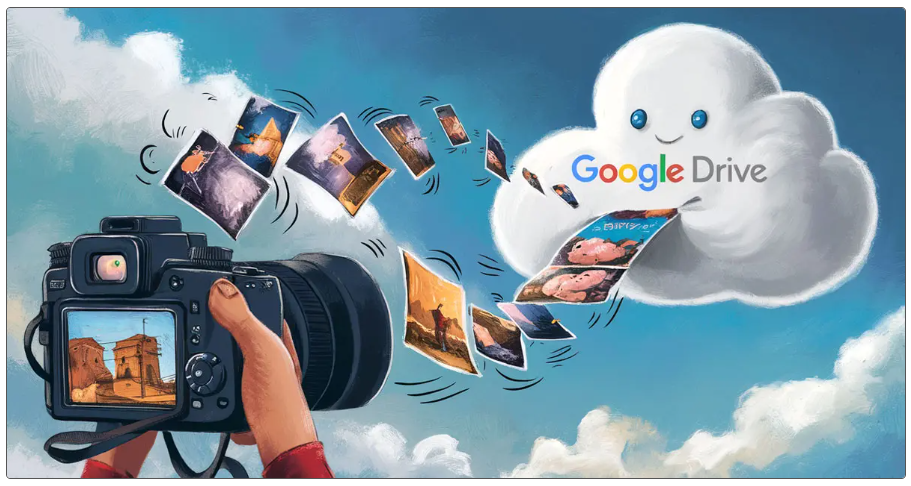

##### 使用攝影機拍照 
參考「開啟並顯示圖片」和「寫入並儲存圖片」兩篇教學，撰寫下列的程式碼，執行後會開啟攝影機，\
按下鍵盤的空白鍵就會將當前的畫面儲存為一張 jpg 圖檔。

In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # 啟用鏡頭
n = 1                      # 照片起始編號

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()               # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 轉換顏色為 BGRA
    key = cv2.waitKey(1)
    if key == 32:                                # 按下空白就截圖存檔
        cv2.imwrite(f'photo-{n}.jpg', img)       # 存檔
        n = n + 1                                # 編號增加 1
    elif key == ord('q'):    # 按下 q 結束
        break
            
    cv2.imshow('oxxostudio', img)               # 顯示圖片

cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

##### 上傳照片到 Google 雲端硬碟 ( 圖片檔案 ) 
能夠拍照後，就能準備照片上傳 Google 雲端硬碟，上傳的方法有兩種，第一種是「將儲存的照片上傳」，\
參考下方程式碼，當按下空白鍵時，就會拍照儲存，接著就將儲存的圖片上傳到 Google 雲端硬碟，\
上傳過程中由於程式碼「同步」的緣故，畫面會暫停等待上傳完成後才會繼續，如果需要使用「非同步」的做法，\
請參考「[threading 多執行緒處理](https://steam.oxxostudio.tw/category/python/library/threading.html)」。

* 參考：[上傳檔案到 Google 雲端硬碟 ( Google Drive )](https://steam.oxxostudio.tw/category/python/example/google-drive.html)

In [ ]:
import cv2

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload, MediaIoBaseUpload

UPLOAD_FOLDER = '你的 Google 雲端資料夾 ID'
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = '金鑰檔案'

# 建立憑證
creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('drive', 'v3', credentials=creds)

def upload(file):
    filename = file 
    media = MediaFileUpload(filename)   # 建立上傳檔案
    file = {'name': filename, 'parents': [UPLOAD_FOLDER]}
    print("正在上傳檔案...")
    file_id = service.files().create(body=file, media_body=media).execute()
    print('雲端檔案ID：' + str(file_id['id']))

cap = cv2.VideoCapture(0)  # 啟用鏡頭
n = 1                      # 照片起始編號

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()               # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 轉換顏色為 BGRA
    key = cv2.waitKey(1)
    if key == 32:                                # 按下空白就截圖存檔
        cv2.imwrite(f'photo-{n}.jpg', img)       # 存檔
        upload(f'photo-{n}.jpg')                 # 上傳檔案
        n = n + 1                                # 編號增加 1
    elif key == ord('q'):    # 按下 q 結束
        break
            
    cv2.imshow('oxxostudio', img)               # 顯示圖片

cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

##### 上傳照片到 Google 雲端硬碟 ( 二進位圖片 ) 
第二種方法可以在拍照時，將圖片轉換成「二進位」檔案格式，就能在「不儲存」的狀態下，直接將圖片上傳到 Google 雲端硬碟，\
詳細步驟請參考下方程式碼：

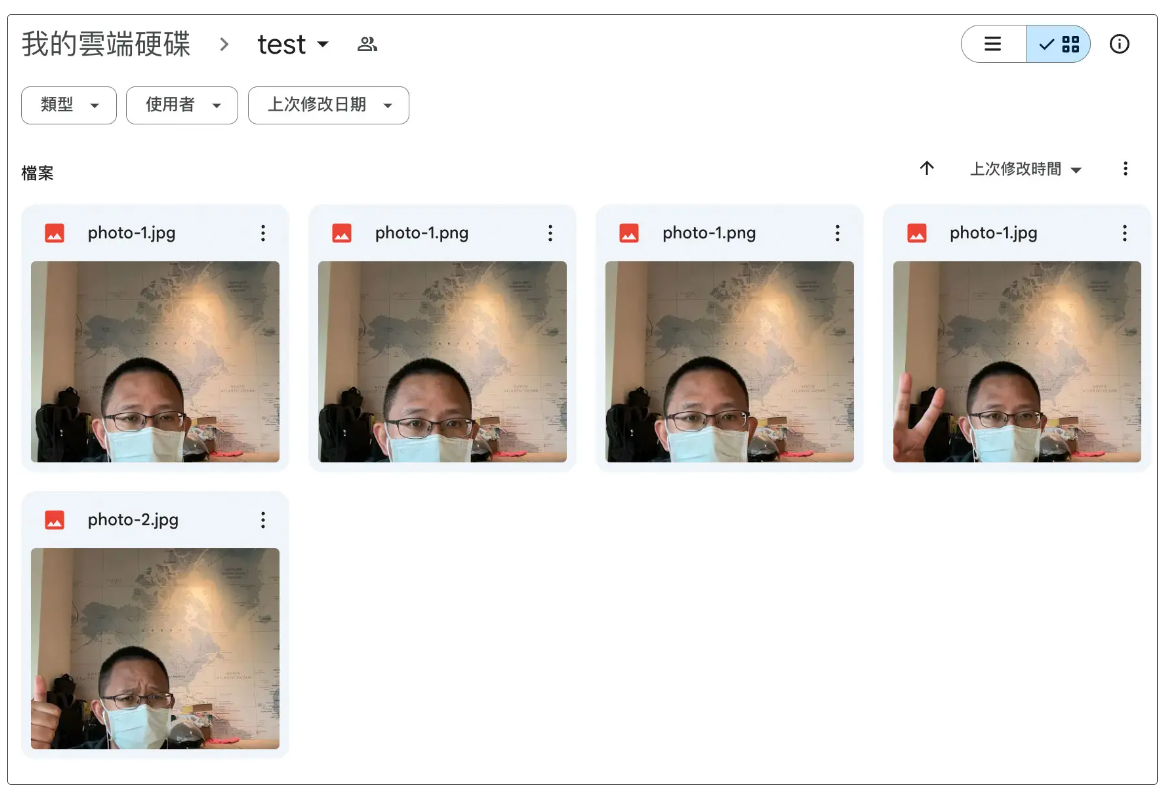

In [ ]:
import cv2, io

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload, MediaIoBaseUpload

UPLOAD_FOLDER = '你的 Google 雲端資料夾 ID'
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = '金鑰檔案'

# 建立憑證
creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('drive', 'v3', credentials=creds)

def upload(image, filename):
    jpg = cv2.imencode('.jpg', image)[1]   # 將 numpy 陣列轉換成 jpg
    imageBytes = io.BytesIO(jpg)           # 將 jpg 轉換成二進位
    media = MediaIoBaseUpload(imageBytes, mimetype='image/jpg', resumable=True)
    file = {'name': filename, 'parents': [UPLOAD_FOLDER]}
    print("正在上傳檔案...")
    file_id = service.files().create(body=file, media_body=media).execute()
    print('雲端檔案ID：' + str(file_id['id']))

cap = cv2.VideoCapture(0)  # 啟用鏡頭
n = 1                      # 照片起始編號

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()               # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)  # 轉換顏色為 BGRA
    key = cv2.waitKey(1)
    if key == 32:                                # 按下空白就截圖上傳
        upload(img, f'photo-{n}.jpg')            # 執行上傳函式
        n = n + 1                                # 編號增加 1
    elif key == ord('q'):    # 按下 q 結束
        break
            
    cv2.imshow('oxxostudio', img)               # 顯示圖片

cap.release()                           # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                 # 結束所有視窗

##### 使用攝影機錄影 
參考「讀取並播放影片」和「寫入並儲存影片」兩篇教學，撰寫下列的程式碼，執行後會開啟攝影機，按下鍵盤的空白鍵就會開始錄影，\
再按一次空白鍵就會結束錄影，就可以不斷按壓空白鍵進行錄影動作。

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
n = 1         # 存檔編號
record = -1   # 判斷是否開始錄影
fourcc = cv2.VideoWriter_fourcc(*"mp4v") # 設定影片的格式為 MP4 影片

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()   # 讀取影片的每一幀
    width = img.shape[1]    # 取得影像寬度
    height = img.shape[0]   # 取得影像高度
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    key = cv2.waitKey(20)
    if key == 32:            # 按下空白就開始錄影
        if record == -1:
            output = cv2.VideoWriter(f'output-{n}.mp4', fourcc, 20.0, (width,  height))  # 產生空的影片
            n = n + 1  # 影片編號
        record = record * -1
    elif key == ord('q'):    # 按下 q 結束
        break
    
    if record == 1:
        output.write(img)  # 寫入影像
    print(record)
            
    cv2.imshow('oxxostudio', img) # 顯示圖片

cap.release()                     # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()           # 結束所有視窗

##### 上傳影片到 Google 雲端硬碟 
能夠錄影後，就能準備影片上傳 Google 雲端硬碟，參考下方程式碼，當按下空白鍵時，就會拍照儲存，接著就將儲存的影片上傳到 Google 雲端硬碟，\
上傳過程中由於程式碼「同步」的緣故，畫面會暫停等待上傳完成後才會繼續，如果需要使用「非同步」的做法，請參考「[threading 多執行緒處理](https://steam.oxxostudio.tw/category/python/library/threading.html)」。

* 參考：[上傳檔案到 Google 雲端硬碟 ( Google Drive )](https://steam.oxxostudio.tw/category/python/example/google-drive.html)

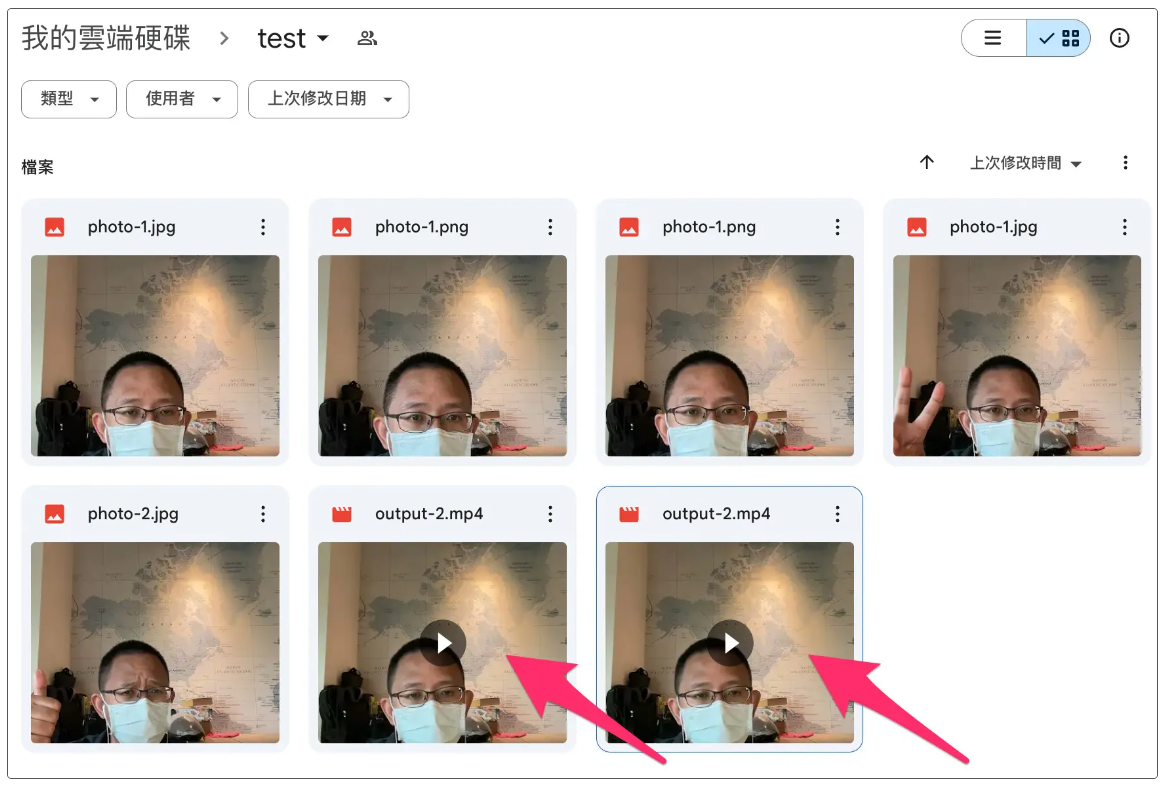

In [ ]:
import cv2

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload, MediaIoBaseUpload

UPLOAD_FOLDER = 'Google 雲端硬碟 ID'
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = '金鑰檔案'

# 建立憑證
creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('drive', 'v3', credentials=creds)

def upload(file):
    filename = file 
    media = MediaFileUpload(filename)   # 建立上傳檔案
    file = {'name': filename, 'parents': [UPLOAD_FOLDER]}
    print("正在上傳檔案...")
    file_id = service.files().create(body=file, media_body=media).execute()
    print('雲端檔案ID：' + str(file_id['id']))

cap = cv2.VideoCapture(0)  # 啟用鏡頭
n = 1                      # 存檔編號
record = -1                # 判斷是否開始錄影
fourcc = cv2.VideoWriter_fourcc(*"mp4v") # 設定影片的格式為 MP4 影片

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()   # 讀取影片的每一幀
    width = img.shape[1]    # 取得影像寬度
    height = img.shape[0]   # 取得影像高度
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    key = cv2.waitKey(20)
    if key == 32:           # 按下空白就開始錄影
        if record == -1:
            output = cv2.VideoWriter(f'output-{n}.mp4', fourcc, 20.0, (width,  height))  # 產生空的影片
        else:
            upload(f'output-{n}.mp4')  # 上傳檔案
            n = n + 1                  # 影片編號
        record = record * -1
    elif key == ord('q'):              # 按下 q 結束
        break
            
    cv2.imshow('oxxostudio', img)      # 顯示圖片
        
    if record == 1:
        output.write(img)  # 寫入影像
    print(record)

cap.release()                          # 所有作業都完成後，釋放資源
cv2.destroyAllWindows()                # 結束所有視窗